In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = '../Data/smhi-opendata_1_71420_20230324_014644.csv'

df = pd.read_csv(data, skiprows=13, sep=";")

In [3]:
df.head()

,Datum,Tid (UTC),Lufttemperatur,Kvalitet,Unnamed: 4,Tidsutsnitt:
0,2022-11-14,01:00:00,11.0,G,NaN,Data från senaste fyra månaderna
1,2022-11-14,02:00:00,10.6,G,NaN,Tidsperiod (fr.o.m.) = 2022-11-14 00:00:01 (UTC)
2,2022-11-14,03:00:00,10.0,G,NaN,Tidsperiod (t.o.m.) = 2023-03-24 01:00:00 (UTC)
3,2022-11-14,04:00:00,9.8,G,NaN,Samplingstid = Ej angivet
4,2022-11-14,05:00:00,9.3,G,NaN,Kvalitetskoderna:


In [4]:
df = df.drop(df.columns[[4, 5]], axis=1)

In [5]:
df.shape

(3119, 4)

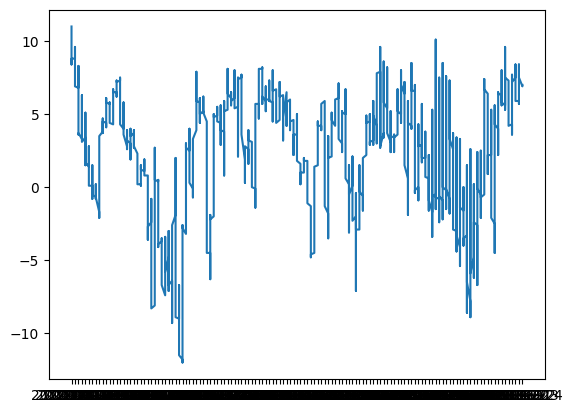

In [6]:
plt.plot(df['Datum'], df['Lufttemperatur'])

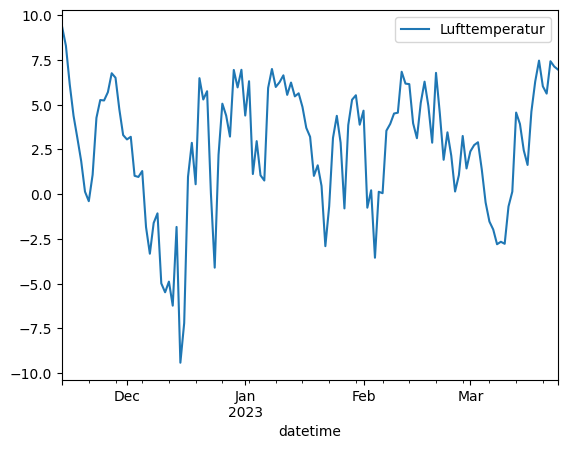

In [7]:
df['datetime'] = pd.to_datetime(df['Datum'] + ' ' + df['Tid (UTC)'])
df.set_index('datetime', inplace=True)

# convert time-series data from one frequency to another Y, M, D, H etc..
df_resampled = df.resample('D').mean(numeric_only=True)

df_resampled.plot(y='Lufttemperatur', kind='line')
plt.show()

In [9]:
import plotly.express as px

df['datetime'] = pd.to_datetime(df['Datum'] + ' ' + df['Tid (UTC)'])
df.set_index('datetime', inplace=True)

# convert time-series data from one frequency to another Y, M, D, H etc..
df_resampled = df.resample('D').mean(numeric_only=True)

fig = px.line(df_resampled, x=df_resampled.index, y='Lufttemperatur')
fig.show()

In [16]:
data = '../Data/smhi-opendata_1_71420_20230324_021744.csv'
df2 = pd.read_csv(data, skiprows=13, sep=";", low_memory=False)

In [17]:
df2

,Datum,Tid (UTC),Lufttemperatur,Kvalitet,Unnamed: 4,Tidsutsnitt:
0,1961-01-01,06:00:00,0.8,G,NaN,Kvalitetskontrollerade historiska data (utom d...
1,1961-01-01,12:00:00,1.0,G,NaN,Tidsperiod (fr.o.m.) = 1961-01-01 00:00:00 (UTC)
2,1961-01-01,18:00:00,1.4,G,NaN,Tidsperiod (t.o.m.) = 2022-12-01 06:00:00 (UTC)
3,1961-01-02,06:00:00,1.8,G,NaN,Samplingstid = Ej angivet
4,1961-01-02,12:00:00,2.2,G,NaN,Kvalitetskoderna:
...,...,...,...,...,...,...
303464,2022-12-01,02:00:00,2.5,G,NaN,NaN
303465,2022-12-01,03:00:00,2.4,G,NaN,NaN
303466,2022-12-01,04:00:00,2.3,G,NaN,NaN
303467,2022-12-01,05:00:00,2.1,G,NaN,NaN


In [18]:
df2 = df2.drop(df2.columns[[4, 5]], axis=1)

In [22]:
df2['datetime'] = pd.to_datetime(df2['Datum'] + ' ' + df2['Tid (UTC)'])
df2.set_index('datetime', inplace=True)

# convert time-series data from one frequency to another Y, M, D, H etc..
df2_resampled = df2.resample('D').mean(numeric_only=True)

fig = px.line(df2_resampled, x=df2_resampled.index, y='Lufttemperatur')
fig.show()